# Notes about this lecture
Because of the Corona virus outbreak, this lecture will not be held in the classroom but online only. Further, the lecture will only be available in this written form. In order to offer support for the students we will use the gitlab issue tracker as a question & answer forum: https://git.ee.ethz.ch/python-for-engineers/class-fs20-forum and individual videoconference sessions when needed.

## Software

### Necessary software
Please install the following tools:
* python3 (https://www.python.org/downloads/ version 3.8.2 is fine.
Python is a prerequisite for jupyter)
* jupyter-notebook (https://jupyter.org/install.html)
* **Hint for Windows and OSX**: Try to install conda or miniconda (https://docs.conda.io/en/latest/miniconda.html) first. This will install Python and jupyter-notebook automatically.

### Optional (but highly recommended) software
* git (https://git-scm.com/download/). Git is harder to install but not strictly necessary. **Hint**: On Windows Git will automatically install a Linux compatible shell which can then be found as 'Git BASH'.
* If git is not available, solutions shall be uploaded on https://polybox.ethz.ch instead and the folder shall be shared with the lecturers. 

## Support
**For any issues please use the forum** at: https://git.ee.ethz.ch/python-for-engineers/class-fs20-forum and follow the instructions therein. In case of need, we will open a room on https://jitsi.riot.im/ and share the audio, video or the screen: make sure you have a microphone and speakers functioning. 

This service is offered only **during the normal lecture hours**.

# Obtaining the material for this lecture
### If git is available on your system (preferred option)
Pull the new material from the upstream repository:

```bash
cd class-fs20
git pull upstream master
```

Then launch the jupyter-notebook and open the Lecture_XX file:

```bash
anaconda # Only on ETH computers to load the Python environment.
jupyter-notebook &
```

### If git is **not** available on your system
Download the latest material from:
https://git.ee.ethz.ch/python-for-engineers/class-fs20/-/archive/master/class-fs20-master.zip
and unpack it on your computer.

# Summary of previous lecture

Please open the jupyter-notebook of the past lecture and read through it. This will help fixing the learned notions into the long-term memory.

### ✏️ $\mu$-exercise

After having refreshed the last lecture, please switch to the Exercise notebook and complete $\mu$-exercise **1**.

# NumPy - replacing MATLAB with Python
## Introduction 

[NumPy](http://www.numpy.org/) (Numerical Python) is a Python library for numerical computation. It is often used in combination with SciPy (Scientific Python) and with Matplotlib (Python module for plotting) to replace MATLAB.

Numpy provides:
* Support for **large** multi-dimensional arrays and matrices together with a wide collections of functions which operate on them.
* Linear algebra functions, Fourier transform, random numbers, etc.
* Fast computation.
* Tools for integrating C/C++ and Fortran code.
* Support for arbitrary/custom data types through `numpy.dtypes`. This is an advanced topic which will not be covered here. For more information see: https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html and https://www.python-course.eu/numpy_dtype.php.

## Importing NumPy

As with any other module in Python, NumPy must be imported before it can be used.

In [ ]:
# This is the most frequent way of importing Numpy.
import numpy as np

## A speed test

NumPy is often faster than standard Python because it uses highly-optimized C-libraries (e.g. BLAS, intelMKL). The example below illustrates the 100x speed advantage when squaring a list of 1000 integers.

In [2]:
# Create a list with standard Python.
L = list(range(1000))

In [3]:
%timeit [i**2 for i in L]
# A typical answer is below,
# but it could different on different PCs:
# 270 µs ± 3.29 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

375 µs ± 19.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [6]:
# Create a "NumPy list" with NumPy.
import numpy as np
a = np.arange(1000)

In [5]:
%timeit a**2
# A typical answer is below,
# but it could different on different PCs:
# 2.64 µs ± 40.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

1.57 µs ± 115 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## N-dimensional arrays (`ndarray`)
The class `ndarray` is one of the most important classes in numpy. The term `ndarray` stands for *n-dimensional array*. Ndarrays are similar to the arrays in Matlab, and they allow operations to be performed in parallel to all elements of the list (vectorized operations).

Ndarray instances have the following properties:

* all elements have the **same type** (in contrast to Python list). The type can be:
    * `bool`
    * `int` (int8, int16, int32, int64)
    * `float`
    * custom datatype (`dtype`)
* Elements are indexed (i.e. user can access them) using tuples of integers

## Creating an ndarray

The most common ways to create an ndarray are:

* `np.array(list)`: this converts any sequence into a `numpy` array
* `np.arange(number)`: this uses `range` function in Python and creates a 1D array from 0-->`number-1`
* `np.zeros(shape)`: this creates an array with the given `shape` and fills it with zeros
* `np.ones(shape)`: same as above, but instead of 0s the array will be filled with 1s
* `np.empty(shape)`: same as above, but the content is random and depends on memory state of the PC
* `np.eye(size)`: creates the `size x size` identity matrix

*Observation:* All the functions above accept the `dtype=` keyword argument. It is possible therefore to define a specific datatype instead of letting NumPy assign one automatically. For a list of all supported datatypes see: https://docs.scipy.org/doc/numpy/user/basics.types.html.

In [7]:
# Create a simple 2-dimensional list.
list = [[2,3,4],[22, 33, 44]]

# Create arrays based on above lists
arr = np.array(list)
arr

array([[ 2,  3,  4],
       [22, 33, 44]])

In [8]:
arr = np.arange(3)
arr

array([0, 1, 2])

In [9]:
# Create a 3-dimensional array
# with zeros as elements
# and with 2x2x3 elements ("shape").
arr = np.zeros((2,2,3))
arr

array([[[0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.]]])

In [10]:
# Create a 3-dimensional array
# with ones as elements
# and with 2x2x3 elements ("shape").
arr = np.ones((2,2,3))
arr

array([[[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]]])

In [11]:
# Create a 3-dimensional array
# with empty (random) elements
# and with 2x2x3 elements ("shape").
arr = np.empty((2,2,3))
arr

array([[[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]]])

In [12]:
# Create a 2-dimensional array
# identity matrix of size 3.
arr = np.eye(3)
arr

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Accessing elements of an ndarray

Elements of an ndarray can be obtained in two ways:

* For a one-dimensional ndarray the same slicing syntax as for lists or tuples applies: `a[start:end:step]`.

* For multi-dimensional arrays the slicing syntax is the same, but the different dimensions are separated by **commas** such as `matrix[i,j]` or `matrix[start:end:stop, start:end:step]`
* Notice that it is also possible to access an n-dimensional array by subsequent application of the slicing operator such as  `matrix[i][j]` or `matrix[start:end:stop][start:end:step]`. This is the same syntax as for normal (non-Numpy) lists. However, the **behaviour is different** from using a single slicing operator. Particularily, with this method it is not easily possible to create n-dimensional slices such as selecting a block out of a matrix.

Examples:    

In [ ]:
# Create a 3x3 matrix.
matrix = np.array([[11, 12, 13], [21, 22, 23], [31, 32, 33]])
# Separate dimensions with a commas.
# Access a sub-block matrix.
sub = matrix[0:2, 1:3]
print(sub)

In [ ]:
# Doing the same with subsequent application of the slicing
# operator leads to a different result.
matrix[0:2][1:3]

Notice that the above syntax with square brackets is nothing else than subsequent application of the slicing operator.

In [ ]:
a = matrix[0:2]
print('matrix[0:2] =\n', a)
b = a[1:3]
print()
print('matrix[0:2][1:3] = (matrix[0:2])[1:3] = a[1:3] = ', b)

### Examples of frequently-used attributes of ndarray

In [13]:
import numpy as np
# Create a 1-dimensional ndarray 
# with elements from 0-23.
my_1d_array = np.arange(24) 
my_1d_array

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [14]:
# Reshape the 1-dimensional array into 
# a 3-dimensional array.
my_3d_tensor = my_1d_array.reshape(2,3,4)  # Notice that 2*3*4 is the size of my_1d_array.
my_3d_tensor

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [15]:
# "ndim" returns the number of 
# axes (dimensions) of the array.
my_3d_tensor.ndim  

3

In [ ]:
# "shape" returns a tuple of integers indicating 
# the size of the array in each dimension.
my_3d_tensor.shape 

In [ ]:
# "size" returns the total number of elements 
# of the array. This is equal to the product 
# of the elements of shape.
my_3d_tensor.size 

In [ ]:
# "dtype" returns an object describing 
# the type of the elements in the array.
my_3d_tensor.dtype

In [ ]:
# "itemsize" returns the size in bytes 
# of each element of the array.
my_3d_tensor.itemsize 

In [ ]:
# "dtype.name" returns the type stored in the array.
my_3d_tensor.dtype.name 

### Changing the shape

Some operations produce 1D arrays by default. This can happen, for example, when reading a list of `x,y,z,some_value` points from file, which should instead be re-shaped into a matrix form.

NumPy allows to change the original shape of an array as follows:

* `ndarray.reshape(new_shape)`: this is a method that takes the array and creates a __NEW__ array with the shape of `new_shape`
* `ndarray.resize(new_shape)`: also modifies the shape of the array, but __changes__ the array __itself__
* `ndarray.ravel()`: returns a flattened (shaped as 1D) array

*Observation*: in the standard case, ravel loops over the last dimensions the fastest. For 2D arrays, this means that the *column* index increments before the *row* index does.

In [ ]:
# Create 1D array from 0-->15.
original = np.arange(16) 

In [ ]:
new = original.reshape((4,4)) # This is a NEW reshaped array.
new

In [ ]:
original # This array stays intact.

In [ ]:
original.resize(4,4) # The method "resize" changes the array itself.
original 

In [ ]:
flattened = original.ravel() # Returns a flattened 1D array.
flattened

**Hint:**
Be aware that many manipulations do not lead to memory duplications. That would be (in most cases) lead to suboptimum performance. You can force copies in memory with the `.copy()` method.

### ✏️ $\mu$-exercise

At this point, please switch to your exercise notebook and complete $\mu$-exercise **2 to 6**.

## Advanced features of ndarrays
### Two-dimensional ndarrays

If an ndarray is 2-dimensional, it can be used to represent a matrix. Even if numpy has a special submodule to perform linear algebra operations, some basic operations are available as part of numpy directly. For example:

* `ndarray.dot(ndarray)` calculates the proper matrix multiplication between the two ndarrays
* `ndarray.T` transposes the ndarray (NOT conjugate transpose)
* `np.diag(ndarray)` gives you the diagonal entries

In [ ]:
A = np.array([[1,2,3], [4,5,6], [7,8,9]])
B = np.array([[7,8,9], [1,2,3], [4,5,6]])

In [ ]:
C = A * B # Element-wise multiplication!
C

In [ ]:
D = A.dot(B) # Matrix multiplication!
D

In [ ]:
C.T # Transpose matrix.

In [ ]:
np.diag(C) # Get diagonal elements.

### Vectorized operations

The term vectorized operation means that, in general, operations on arrays are performed element-wise, meaning that there is no need for writing specific `for` loops to change every single element in the array.

In [ ]:
data = np.arange(10)
data

In [ ]:
data + 2 # Adds two to every element, NOT an inplace operation.

In [ ]:
data += 2. # This generates error! The reason is that dtype of data is int, while we are adding float.

In [ ]:
data**2 # Every element is squared.

In [ ]:
2*data + data # The sum of array is always element-wise.

### Function vectorization 

In NumPy, a universal function (or _ufunc_) is a function that performs its operation element-wise on the data in `ndarrays`. Universal functions are defined inside the `numpy` module and they are usually one or two orders-of-magnitude faster than the same function written in pure Python by performing a for loop instead.

These are common unary (only one array as parameter) _ufuncs_:
* `abs`, `fabs`: Compute abs. value element-wise. Use `fabs` for non-complex-valued arrays.
* `sqrt`: Compute square root.
* `square`: Compute square of array element-wise.
* `exp`: Compute the exponent e^x of each element.
* `log`, `log2`, `log10`, `log1p`: Logarithm (natural, base 2, base 10, base (1+x)).
* `sign`: Sign of each element: +1(positive), 0 (zero), -1(negative).
* `ceil`: Ceiling of each element.
* `floor`: Floor of each element.
* `modf`: Returns a tuple of arrays: integral and fractional part of each element.
* `isnan`: Return boolean array indicating whether element is NaN (Not a Number).
* `isfinite`, `isinf`: Return boolean array indicating if each element is finite.
* `cos`, `sin`, `cosh`, `sinh`, `tan`, `tanh`: Trigonometrical functions.
* `arcos`, ... : Inverse trigonometric functions.

These are common binary (two arrays as parameter) _ufuncs_:
* `add`, `substract`, `multiply`: +, - , * element-wise.
* `divide`, `floor_divide`: divide or floor divide (truncating the remainder).
* `power`: raise elements to powers indicated in second array.
* `maximum`, `fmax`: Element-wise maximum; fmax ignores NaN.
* `minimum`, `fmin`: Element-wise minimum; fmin ignores NaN.
* `mod`: Element-wise modulus (remainder of division).


### Create vectorized functions - `np.vectorize()`
Creating vectorized functions can be done in two ways. Either by composition of other vectorized functions or with the `np.vectorize()` function. Examples are shown in the following.

In [ ]:
import numpy as np
def f_composed(t):
    """
    Compute the value of a damped oscillation at time t.
    """
    
    # Express the function as a combination of vectorized functions,
    # hence this function is also vectorized.
    return np.exp(-t) * np.cos(t) * 2

# The function can be called with a single value as arguments.
print(f_composed(0))

# The function can also be called with vectors as arguments.
t = np.array([0, np.pi/2, np.pi])
print(f_composed(t))

In [ ]:
import numpy as np

def isprime(n) -> bool:
    """
    Test if an integer `n` is a prime number.
    """
    
    if n < 2:
        # Numbers smaller than 2 are never prime numbers.
        return False
    # Brute-force check.
    for i in range(2, int(np.sqrt(n))+1):
        if n % i == 0:
            return False
    return True

# As expected this function can be called for a single value.
print("isprime(7) =", isprime(7))
print("isprime(77) =", isprime(77))

# However, this function is *not* vectorized because it is not
# composed of vectorized operations.

numbers = np.arange(10)
# This would raise a `ValueError`:
# isprime(numbers)

In [ ]:
# Create a vectorized version of `isprime`.
isprime_vectorized = np.vectorize(isprime)

# `isprime_vectorized` is now callable like a normal function 
# but can now element-wise operate on vectors.

numbers = np.arange(10)
print(numbers)
print(isprime_vectorized(numbers))

# The vectorized function can still be used like the original function.
print(isprime_vectorized(7))

### `np.vectorize` as 'decorator' (optional)
`np.vectorize` takes a function as input and transforms it into another function (or into a callable object actually). This pattern is common enough that Python supports it with a special syntax named *decorators* (https://www.python.org/dev/peps/pep-0318/).


Suppose there is a function `f` which should be transformed into another function. Without decorators this can be done as follows:
```python
def f(x):
    ...
    return y

# Create a new function.
# Notice that the old function `f` gets overwritten.
f = transformation_function(f)
```

The decorator syntax allows to write this shorter. The both versions above and below are equivalent.

```python
@transformation_function
def f(x):
    ...
    return y
```

In [ ]:
import numpy as np

# Use `np.vectorize` as a *decorator* to vectorize the following function.
@np.vectorize
def isprime(n) -> bool:
    """
    Test if an integer `n` is a prime number.
    """
    
    if n < 2:
        # Numbers smaller than 2 are never prime numbers.
        return False
    # Brute-force check.
    for i in range(2, int(np.sqrt(n))+1):
        if n % i == 0:
            return False
    return True

# `isprime` has been vectorized by the decorator.
# Therefore `isprime` can now operate on `np.ndarray`s.
numbers = np.arange(10)
isprime(numbers)

### Other functions for `np.ndarray`
Numpy offers many more functions that operate on `np.ndarray` objects. A comprehensive list can be found here: https://docs.scipy.org/doc/numpy/reference/

For example this includes sorting, random number generation or string operations:

In [ ]:
# Numpy supports sorting of `nd.array`s.

a = np.array([3, 5, 1])
np.sort(a)

In [ ]:
# Numpy supports efficient creation of pseudo-random n-dimensional data.

# Generate a 2x3 matrix with numbers uniformly distributed between 0 and 1.
uniform = np.random.rand(2,3)
print(uniform)

# Generate an array of 10 random numbers with normal distribution
# with a mean value of 3 and a standard deviation of 0.1
normal = np.random.normal(3, 0.1, 10)
print(normal)

In [ ]:
# Numpy supports vectorized string operations.
strings = np.array(["hello", "Python", "!"])
np.char.capitalize(strings)

### Broadcasting

Numpy performs *array broadcasting* to support operations on arrays with different dimensions.
https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

Usually, Numpy operations are done element-by-element on pairs of arrays:

In [ ]:
a = np.array([1, 2, 3])
b = np.array([1, 1, 1])
# Perform an elementy-by-element operation.
a + b

The simplest example of array broadcasting is shown in the following when a one-dimensional number is added to a `np.ndarray`:

In [ ]:
b = 1
# Here the dimensions of `a` and `b` are different.
# One can think of `b` being *broadcasted* to the dimension of `a`
# before the operation. Which means the value of `b` is repeated to match the shape of `a`.
a + b

In [ ]:
# Create a 3x1 array and a 1x3 array.
a = np.arange(3).reshape(3, 1)
b = np.arange(3).reshape(1, 3)
print(a)
print(b)

In [ ]:
# Now `a` and `b` have different dimensions.
# Nevertheless Numpy supports pairwise operations on them.
# Similar to the example above the arrays are repeated such that they both have the same dimension.
c = a * b

# The above operation is equivalent to the following:
# [[0 0 0]           [[0 1 2]
#  [1 1 1]     *      [0 1 2]
#  [2 2 2]]           [0 1 2]]
#     |                  |
#    repeated columns   repeated rows

print(c)

The function `np.broadcast_arrays()` can be used to see how Numpy broadcasts the arrays prior to the operation.

In [ ]:
a_bc, b_bc = np.broadcast_arrays(a, b)
print('a:', a.shape)
print(a)
print('')
print('a_bc:', a_bc.shape)
print(a_bc)
print('')
print('b:', b.shape)
print(b)
print('')
print('b_bc:', b_bc.shape)
print(b_bc)

This suggests that `c` is actually equal to `a_bc` element-wise multiplied with `b_bc`.

If the array shapes cannot be matched to each other a `ValueError` is raised.

In [ ]:
d = np.random.rand(3,5)
e = np.random.rand(8)

In [ ]:
f = d * e

### Changing array dimension to enable broadcasting (optional)
To make broadcasting possible in the above example `d` can be extended by a new dimension. Broadcasting then works along the new dimension.

A new dimension or axis can be added by passing `np.newaxis` to the slicing operator:

In [ ]:
d_na = d[...,np.newaxis]
print('d:', d.shape)
print(d)
print()
print('d with newaxis:', d_na.shape)
print(d_na)

Now `d_na` and `e` can be broadcasted together:

In [ ]:
f = d_na * e

In [ ]:
f.shape

### Boolean indexing

As mentioned above, an `ndarray` can contain logical (boolean) values. The only allowes values are: `True` or `False`.

One interesting way of using boolean `ndarray` is to index some other array.

A *boolean index* `i` for the `ndarray` `x` is also an `ndarray` with the same dimensions as `x`. The boolean values in the index tell which elements of `x` will be selected. This is illustrated in the following examples:

In [ ]:
# Create an example array.
numbers = np.array([1, 2, 3, 4])

# Create a boolean index.
boolean_index = [False, True, True, False]

# Retreive elements from the array using the boolean index.
# The boolean index must have the same dimensions as the array.
# An element in the array is accessed if and only if the
# boolean index is `True` at the corresponding position.
numbers[boolean_index]

In [ ]:
# Boolean indices can also be created by comparing an array.

# Create a boolean index that points to all even numbers.
selection = numbers % 2 == 0
print(selection)

# Get the even numbers based on the boolean index.
even_numbers = numbers[selection]
print(even_numbers)

The boolean index *must* have the same dimensions as the array.

In [ ]:
# This fails because the index has a wrong dimension.
numbers[[True, False]]

In [ ]:
# Boolean indices can also be used to modify elements in an array.

numbers = np.array([0, -1, 2, -3, 4])

# Get a boolean index of the negative numbers.
negative_numbers = numbers < 0

# Set the negative numbers to 0.
numbers[negative_numbers] = 0
numbers

### ✏️ $\mu$-exercise

At this point, please switch to your exercise notebook and complete $\mu$-exercises **7**.

## Linear algebra
NumPy supports also linear algebra. Linear algebra functions are located inside a the submodule `numpy.linalg`. These are some of most used functions:



| Function        | Description |
| ------------- |-------------| 
| `det` | Matrix determinant |
| `trace` | Matrix trace (sum of elements on main diagonal)| 
| `eig` | Compute eigenvalues and eigenvectors of a matrix      | 
| `inv` | Compute inverse of a matrix      | 
| `pinv` | Compute pseudo-inverse      | 
| `qr` | Compute QR decomposition of a matrix     | 
| `svd` | Compute Singular Value Decomposition of a matrix      | 
| `solve` | Solve linear system A\*x = b   for _x_   | 


Internally, these functions are implemented using established FORTRAN libraries (BLAS, LAPACK and IntelMKL). The speed of NumPy is therefore comparable with MATLAB for example.

In [ ]:
# Import the linear algebra submodule.
from numpy.linalg import solve

In the following example, we want to solve this system of equations:

\begin{equation}
\begin{cases}
6x_0 + x_1 = 9 \\
2x_0 + 2x_1 = 8
\end{cases}
\end{equation}

We reformulate it in matrix form:

\begin{equation}
\text{given  } A = \begin{bmatrix} 6 & 1 \\ 2 & 2 \end{bmatrix} \text{ and } b = \begin{bmatrix} 9 \\ 8 \end{bmatrix} \text{solve  } Ax=b \text{  for  } x
\end{equation}

And solve it with numpy:

In [ ]:
A = np.array([[6,1], [2,2]])
b = np.array([9,8])
x = np.linalg.solve(A,b)
x

In [ ]:
# Sanity check: is the solution valid?
A.dot(x) - b

### ✏️ $\mu$-exercise

At this point, please switch to your exercise notebook and complete $\mu$-exercises **8** and **9**.

## Methods for statistics

NumPy provides several functions (methods) for statistics. These can be applied on an entire ndarray at once, or on a single dimension at the time.

For example, it is possible to compute the average value of all elements of a matrix, or of a single row, or column.

Here are some examples:

* `sum`: Sum of all the elements in the array, or along an axis.
* `mean`: Arithmetic mean
* `std`, `var`: Standard deviation and variance.
* `min`, `max`: Minimum and maximum
* `argmin`, `argmax`: Indices of minimum and maximum


As an example, let's simulate the Brownian motion of a particle in a 3-dimensional space. Let's assume that the three coordinates of the particle (x, y, z), when measured at different time, are distributed according to a Gaussian (normal) distribution.

Let's "measure" the location of the particle a few times and store all the coordinates in a matrix:

In [ ]:
# Create a 2-dimensional ndarray (a matrix)
# representing measured coordinates, like:
# (x0, y0, z0)  measurement 0
# (x1, y1, z1)  measurement 1
# (x2, y2, z2)  measurement 2
# .... and so on.
n_measurements = 5
# Generate an nparray of shape (n_measurement, 3)
# and Gaussian distribution.
v = np.random.normal(size = (n_measurements,3))
print("Measurement 0: [x y z] = ",v[0,:])
print("Measurement 1: [x y z] = ",v[1,:])
print('')
print(v)

In [ ]:
# "fabs" computes the absolute value element by element.
# Compute absolute value of each coordinate.
print(np.fabs(v))
#np.fabs(v).max(axis=1)

In [ ]:
# Print maximum value among **all** coordinates.
print(v.max())
# Print maximum value along the first dimension.
print(v.max(axis = 0)) 
# Print maximum value along the second dimension.
print(v.max(axis = 1)) 
#print(np.max(v, axis = 1))   # Equivalent syntax.

In [ ]:
# compute at which point in time (i.e. which array index)
np.fabs(v).argmax(axis=1)

In [ ]:
# Calculate standard deviation
# along the first dimension.
v.std(axis=0)

## NumPy for image processing

In the example below we will import an image using the module `matplotlib` (which will be the topic of the next lecture) to demonstrate that matplotlib is built on top of numpy, and to demonstrate that image manipulation is equivalent to the manipulation of ndarrays.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# Import image as 3-dimensional ndarray.
image = plt.imread('./cat.png')

In [3]:
# Image is now casted into the ndarray
print(type(image))
print(image.dtype)
print(image.shape)

<class 'numpy.ndarray'>
float32
(213, 240, 3)


### Short parenthesis: red, green and blue (RGB) values

When importing an image with plt.imread as in the example above, the image is represented by a certain number of pixels (the first two dimensions of the ndarray) for each of the tree RGB colors (represented by the third dimension). 

This image has color depth of 256 (output of `image.dtype`), meaning that it can represent 256 different intensities per color.

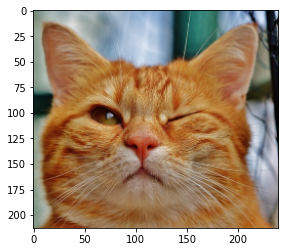

In [2]:
# Show the full image.
# plt.axis('off')
plt.imshow(image[:,:,:])

In [ ]:
# Set to red color to zero.
image[:,:,0] = 0
# Set to green color to zero.
image[:,:,1] = 0
# Plot what remains.
plt.imshow(image[:,:,:])

# Intensity of RED component at pixel (100,200) in the image:
print(image[100,200,0])

# Intensity of GREEN component at pixel (100,200) in the image:
print(image[100,200,1])

# Intensity of BLUE component at pixel (100,200) in the image:
print(image[100,200,2])

# Exercises
Please solve the rest of the exercises.

# Uploading solutions
Before the end of the class at about 16:00, please "push" your solutions. 

Please do so even if you have not solved all problems: additional
uploads can be made in the following days. Instructions are below.

### If git is available on your system (preferred option)
Add, commit and push your changes to the remote server:

`git add -A`

`git commit -m 'My solutions to Lecture XX'`

`git push origin master`

### If git is **not** available on your system
This is **not** the favourite solution and it should be avoided whenever possible.

Upload your Lecture_XX folder (containing the Exercise file) to the polybox https://polybox.ethz.ch and share the folder with luca.alloatti@ief.ee.ethz.ch, thomas.kramer@ief.ee.ethz.ch, and raphael.schwanninger@ief.ee.ethz.ch . To share the folder go on https://polybox.ethz.ch , then on the right of the folder there is a graph with one vertex connecting to two other vertices: click on it and then type the three emails.